# Лабораторная работа №2. "Обработка признаков (часть 1)"
## Выполнил: Громоздов Д.Р.; группа ИУ5-23М

Цель лабораторной работы: изучение продвинутых способов предварительной обработки данных для дальнейшего формирования моделей.

### Задание:
Выбрать набор данных (датасет), содержащий категориальные и числовые признаки и пропуски в данных. Для выполнения следующих пунктов можно использовать несколько различных наборов данных (один для обработки пропусков, другой для категориальных признаков и т.д.) Просьба не использовать датасет, на котором данная задача решалась в лекции.
Для выбранного датасета (датасетов) на основе материалов лекций решить следующие задачи:

a) устранение пропусков в данных;
b) кодирование категориальных признаков;
c) нормализацию числовых признаков.

In [2]:
#импортируем библиотеки
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator
from category_encoders.target_encoder import TargetEncoder as ce_TargetEncoder
from sklearn.preprocessing import LabelEncoder
%matplotlib inline 
sns.set(style="ticks")

## Устранение пропусков в данных

In [3]:
skip = pd.read_csv('data/gold.csv', sep=",")

In [4]:
skip.shape


(172, 20)

In [5]:
list(zip(skip.columns, [i for i in skip.dtypes]))

[('Date', dtype('O')),
 ('US dollar (USD)', dtype('float64')),
 ('Euro (EUR)', dtype('float64')),
 ('Japanese yen (JPY)', dtype('float64')),
 ('Pound sterling (GBP)', dtype('float64')),
 ('Canadian dollar (CAD)', dtype('float64')),
 ('Swiss franc (CHF)', dtype('float64')),
 ('Indian rupee (INR)', dtype('float64')),
 ('Chinese renmimbi (CNY)', dtype('float64')),
 ('Turkish lira (TRY)', dtype('float64')),
 ('Saudi riyal (SAR)', dtype('float64')),
 ('Indonesian rupiah (IDR)', dtype('float64')),
 ('UAE dirham (AED)', dtype('float64')),
 ('Thai baht THB)', dtype('float64')),
 ('Vietnamese dong (VND)', dtype('float64')),
 ('Egyptian pound (EGP)', dtype('float64')),
 ('Korean won (KRW)', dtype('float64')),
 ('Russian ruble (RUB)', dtype('float64')),
 ('South African rand (ZAR)', dtype('float64')),
 ('Australian dollar (AUD)', dtype('float64'))]

In [6]:
skip.head()

,Date,US dollar (USD),Euro (EUR),Japanese yen (JPY),Pound sterling (GBP),Canadian dollar (CAD),Swiss franc (CHF),Indian rupee (INR),Chinese renmimbi (CNY),Turkish lira (TRY),Saudi riyal (SAR),Indonesian rupiah (IDR),UAE dirham (AED),Thai baht THB),Vietnamese dong (VND),Egyptian pound (EGP),Korean won (KRW),Russian ruble (RUB),South African rand (ZAR),Australian dollar (AUD)
0,Q1 1979,240.10,148.04,50274.29,116.22,278.16,406.20,1940.16,0.0,0.0,796.73,148844.15,910.39,4812.88,0.0,0.0,116123.63,0.0,202.37,214.55
1,Q2 1979,277.50,169.03,60161.40,127.29,322.55,457.71,2190.55,0.0,0.0,923.02,166854.38,1049.81,5477.29,0.0,0.0,133065.59,0.0,232.34,245.46
2,Q3 1979,397.25,233.23,89088.49,180.36,460.72,616.45,3190.26,0.0,0.0,1306.81,242994.79,1474.44,7894.94,0.0,0.0,191720.57,0.0,327.15,351.67
3,Q4 1979,512.00,299.12,125630.27,230.63,611.81,835.57,4189.64,0.0,0.0,1749.03,324101.29,2055.87,10645.23,0.0,0.0,253615.89,0.0,434.07,474.31
4,Q1 1980,494.50,321.56,125800.01,228.51,599.47,931.87,4155.35,0.0,0.0,1683.53,316964.84,1890.49,10312.81,0.0,0.0,294925.42,0.0,407.51,465.18


Датасет имеет пропуски, но они в данном случае заполнены нулевыми значениями. Приведём колонки, содержащие нули к виду, который воспринимает pandas и numpy:

In [7]:
#converting null-values
skip.loc[(skip['Chinese renmimbi (CNY)'] == 0.0), "Chinese renmimbi (CNY)"] = pd.NA
skip.loc[(skip['Turkish lira (TRY)'] == 0.0), "Turkish lira (TRY)"] = np.nan
skip.loc[(skip['Vietnamese dong (VND)'] == 0.0), "Vietnamese dong (VND)"] = pd.NA
skip.loc[(skip['Egyptian pound (EGP)'] == 0.0), "Egyptian pound (EGP)"] = pd.NA
skip.loc[(skip['Russian ruble (RUB)'] == 0.0), "Russian ruble (RUB)"] = pd.NA
skip.head()

,Date,US dollar (USD),Euro (EUR),Japanese yen (JPY),Pound sterling (GBP),Canadian dollar (CAD),Swiss franc (CHF),Indian rupee (INR),Chinese renmimbi (CNY),Turkish lira (TRY),Saudi riyal (SAR),Indonesian rupiah (IDR),UAE dirham (AED),Thai baht THB),Vietnamese dong (VND),Egyptian pound (EGP),Korean won (KRW),Russian ruble (RUB),South African rand (ZAR),Australian dollar (AUD)
0,Q1 1979,240.10,148.04,50274.29,116.22,278.16,406.20,1940.16,<NA>,NaN,796.73,148844.15,910.39,4812.88,<NA>,<NA>,116123.63,<NA>,202.37,214.55
1,Q2 1979,277.50,169.03,60161.40,127.29,322.55,457.71,2190.55,<NA>,NaN,923.02,166854.38,1049.81,5477.29,<NA>,<NA>,133065.59,<NA>,232.34,245.46
2,Q3 1979,397.25,233.23,89088.49,180.36,460.72,616.45,3190.26,<NA>,NaN,1306.81,242994.79,1474.44,7894.94,<NA>,<NA>,191720.57,<NA>,327.15,351.67
3,Q4 1979,512.00,299.12,125630.27,230.63,611.81,835.57,4189.64,<NA>,NaN,1749.03,324101.29,2055.87,10645.23,<NA>,<NA>,253615.89,<NA>,434.07,474.31
4,Q1 1980,494.50,321.56,125800.01,228.51,599.47,931.87,4155.35,<NA>,NaN,1683.53,316964.84,1890.49,10312.81,<NA>,<NA>,294925.42,<NA>,407.51,465.18


In [8]:
#проверяем, что теперь эти колонки видимы, как пропуски
cols_with_na = [col for col in skip.columns if skip[col].isnull().sum() > 0]
cols_with_na

['Chinese renmimbi (CNY)',
 'Turkish lira (TRY)',
 'Vietnamese dong (VND)',
 'Egyptian pound (EGP)',
 'Russian ruble (RUB)']

In [9]:
#считаем пропуски и заодно удостоверимся, что заменились только нули, а не все данные
[(col, skip[col].isnull().sum()) for col in cols_with_na]

[('Chinese renmimbi (CNY)', 24),
 ('Turkish lira (TRY)', 15),
 ('Vietnamese dong (VND)', 43),
 ('Egyptian pound (EGP)', 39),
 ('Russian ruble (RUB)', 56)]

In [10]:
# Вычислим проценты пропусков
[(col, skip[col].isnull().mean()) for col in cols_with_na]

[('Chinese renmimbi (CNY)', 0.13953488372093023),
 ('Turkish lira (TRY)', 0.0872093023255814),
 ('Vietnamese dong (VND)', 0.25),
 ('Egyptian pound (EGP)', 0.22674418604651161),
 ('Russian ruble (RUB)', 0.32558139534883723)]

Пропусков в колонках достаточно много, будем работать с колонкой турецкой лиры, у неё процент пропусков наименьший.

In [11]:
skip_drop = skip[['Turkish lira (TRY)']].dropna()
skip_drop.shape

(157, 1)

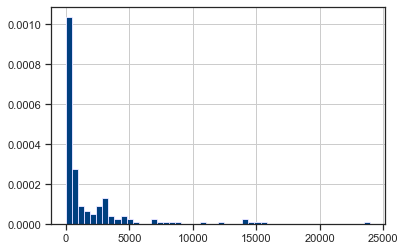

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111)
skip["Turkish lira (TRY)"].hist(bins=50, ax=ax, density=True, color='green')
skip_drop["Turkish lira (TRY)"].hist(bins=50, ax=ax, color='blue', density=True, alpha=0.5)
plt.show()

Распределение ассиметричное и от удаления пропусков почти не изменилось. Датасет небольшого размера, поэтому не будем использовать метод заполнения случайными значениями. Пропуски распределены случайно, распределение не выглядит однозначно одномодальным. Из-за ассиметричности заполним пустые значения медианой распределения.

In [13]:
def impute_column(dataset, column, strategy_param, fill_value_param=None):
    """
    Заполнение пропусков в одном признаке
    """
    temp_data = dataset[[column]].values
    size = temp_data.shape[0]
    
    indicator = MissingIndicator()
    mask_missing_values_only = indicator.fit_transform(temp_data)
    
    imputer = SimpleImputer(strategy=strategy_param, 
                            fill_value=fill_value_param)
    all_data = imputer.fit_transform(temp_data)
    
    missed_data = temp_data[mask_missing_values_only]
    filled_data = all_data[mask_missing_values_only]
    
    return all_data.reshape((size,)), filled_data, missed_data

In [14]:
all_data, filled_data, missed_data = impute_column(skip, 'Turkish lira (TRY)', 'median')

In [15]:
all_data

array([4.905400e+02, 4.905400e+02, 4.905400e+02, 4.905400e+02,
       4.905400e+02, 4.905400e+02, 4.905400e+02, 4.905400e+02,
       4.905400e+02, 4.905400e+02, 4.905400e+02, 4.905400e+02,
       4.905400e+02, 4.905400e+02, 4.905400e+02, 8.000000e-02,
       8.000000e-02, 9.000000e-02, 1.000000e-01, 1.100000e-01,
       1.200000e-01, 1.400000e-01, 1.400000e-01, 1.400000e-01,
       1.500000e-01, 1.700000e-01, 1.800000e-01, 1.800000e-01,
       2.200000e-01, 2.300000e-01, 2.900000e-01, 2.800000e-01,
       3.300000e-01, 3.800000e-01, 4.200000e-01, 4.700000e-01,
       5.400000e-01, 6.100000e-01, 6.400000e-01, 7.500000e-01,
       7.800000e-01, 8.000000e-01, 7.900000e-01, 9.200000e-01,
       8.800000e-01, 9.200000e-01, 1.120000e+00, 1.120000e+00,
       1.320000e+00, 1.600000e+00, 1.650000e+00, 1.800000e+00,
       2.140000e+00, 2.370000e+00, 2.530000e+00, 2.860000e+00,
       3.190000e+00, 4.140000e+00, 4.370000e+00, 5.830000e+00,
       1.010000e+01, 1.204000e+01, 1.351000e+01, 1.4830

In [16]:
filled_data

array([490.54, 490.54, 490.54, 490.54, 490.54, 490.54, 490.54, 490.54,
       490.54, 490.54, 490.54, 490.54, 490.54, 490.54, 490.54])

In [17]:
missed_data

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan])

## Кодирование категориальных признаков

In [36]:
data_code = pd.read_csv('data/prices_tunisia.csv', sep=",")

In [19]:
data_code.head()

,category,room_count,bathroom_count,size,type,price,city,region,log_price
0,Terrains et Fermes,-1.0,-1.0,-1.0,À Vendre,100000.0,Ariana,Raoued,5.000000
1,Terrains et Fermes,-1.0,-1.0,-1.0,À Vendre,316000.0,Ariana,Autres villes,5.499687
2,Appartements,2.0,1.0,80.0,À Louer,380.0,Ariana,Autres villes,2.579784
3,Locations de vacances,1.0,1.0,90.0,À Louer,70.0,Ariana,Autres villes,1.845098
4,Appartements,2.0,2.0,113.0,À Vendre,170000.0,Ariana,Ariana Ville,5.230449


In [20]:
data_coded = ce_TargetEncoder().fit_transform(data_code[data_code.columns.difference(['category', 'region', 'log_price'])], data_code['log_price'])

In [21]:
data_coded

,bathroom_count,city,price,room_count,size,type
0,-1.0,4.396202,100000.0,-1.0,-1.0,5.377462
1,-1.0,4.396202,316000.0,-1.0,-1.0,5.377462
2,1.0,4.396202,380.0,2.0,80.0,2.814535
3,1.0,4.396202,70.0,1.0,90.0,2.814535
4,2.0,4.396202,170000.0,2.0,113.0,5.377462
...,...,...,...,...,...,...
12743,-1.0,4.097203,3200000.0,-1.0,-1.0,5.377462
12744,1.0,4.097203,600.0,1.0,100.0,2.814535
12745,1.0,4.097203,1950000.0,3.0,760.0,5.377462
12746,1.0,4.097203,240000.0,3.0,190.0,5.377462


In [22]:
data_code['city'].unique()

array(['Ariana', 'Béja', 'Ben arous', 'Bizerte', 'Gabès', 'Gafsa',
       'Jendouba', 'Kairouan', 'Kasserine', 'Kébili', 'La manouba',
       'Le kef', 'Mahdia', 'Médenine', 'Monastir', 'Sidi bouzid',
       'Siliana', 'Sousse', 'Tataouine', 'Tozeur', 'Zaghouan', 'Sfax',
       'Nabeul', 'Tunis'], dtype=object)

In [23]:
data_code['type'].unique()

array(['À Vendre', 'À Louer'], dtype=object)

In [24]:
data_coded['type'].unique()

array([5.3774619 , 2.81453498])

In [25]:
data_coded['city'].unique()

array([4.39620214, 4.90930135, 4.15538361, 4.78524077, 3.96298515,
       4.44028374, 4.18190954, 4.61209125, 5.11869215, 4.53633001,
       4.56126995, 4.73824287, 4.45284526, 4.4577953 , 4.16867301,
       4.87923999, 4.89301342, 4.31520906, 5.28244075, 3.06856425,
       4.9728682 , 4.41526039, 5.0677924 , 4.0972025 ])

In [31]:
#закодировать лейблами категории и конкатенировать
le = LabelEncoder()
category_le = le.fit_transform(data_code['category'])

In [50]:
np.unique(category_le)

array([0, 1, 2, 3, 4, 5, 6])

In [33]:
#преобразуем полученный массив в колонку
data_tempor = np.array(category_le)
data_le = pd.DataFrame(data_tempor, columns=['category_le'])

In [55]:
#объединяем колонки оригинальной таблицы с кодированными колонками 
data_result = pd.concat([data_le['category_le'], data_code.iloc[:, 1:4], data_coded['type'], data_code['price'], data_coded['city'], data_code[['region', 'log_price']]], axis=1)

In [56]:
#итоговая таблица с кодированными категориальными признаками.
data_result.head(10)

,category_le,room_count,bathroom_count,size,type,price,city,region,log_price
0,6,-1.0,-1.0,-1.0,5.377462,100000.0,4.396202,Raoued,5.000000
1,6,-1.0,-1.0,-1.0,5.377462,316000.0,4.396202,Autres villes,5.499687
2,0,2.0,1.0,80.0,2.814535,380.0,4.396202,Autres villes,2.579784
3,3,1.0,1.0,90.0,2.814535,70.0,4.396202,Autres villes,1.845098
4,0,2.0,2.0,113.0,5.377462,170000.0,4.396202,Ariana Ville,5.230449
5,3,1.0,1.0,70.0,2.814535,80.0,4.396202,Autres villes,1.903090
6,0,2.0,1.0,100.0,2.814535,670.0,4.396202,Borj Louzir,2.826075
7,4,2.0,1.0,20.0,2.814535,650.0,4.396202,Borj Louzir,2.812913
8,6,-1.0,-1.0,-1.0,5.377462,180000.0,4.396202,Autres villes,5.255273
9,4,1.0,1.0,40.0,2.814535,450.0,4.396202,Ariana Ville,2.653213


## Нормализация числовых признаков:

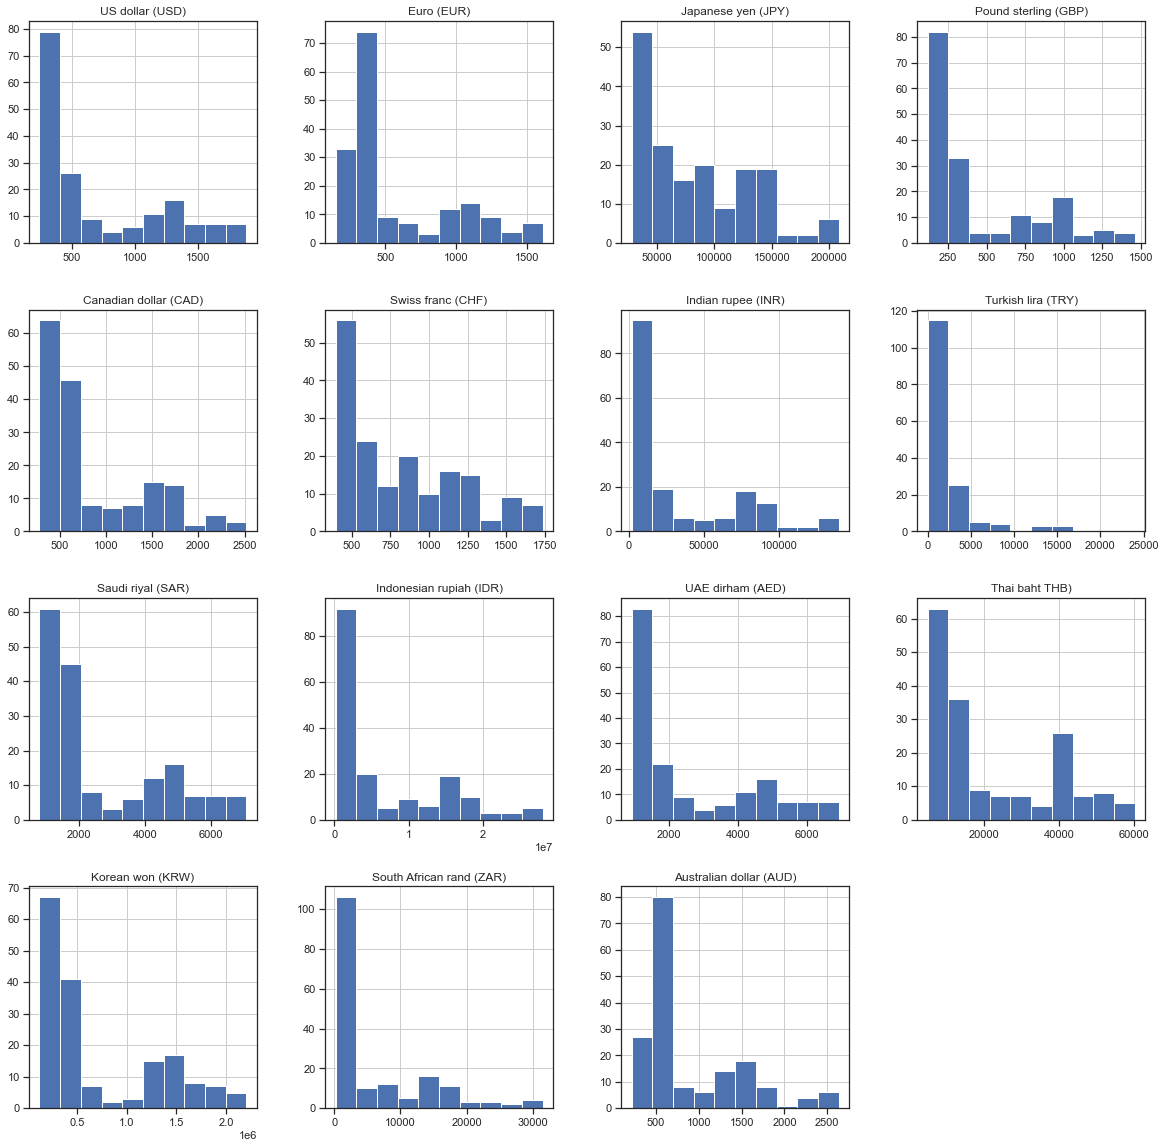

In [38]:
#нормализуем признак из предыдущего датасета
skip.hist(figsize=(20,20))
plt.show()

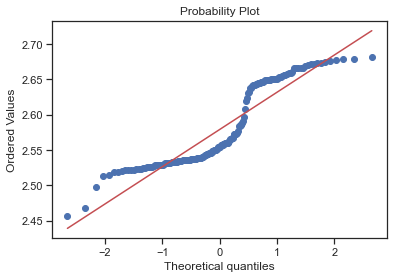

In [45]:
stats.probplot(skip['Korean won (KRW)'], dist="norm", plot = plt)
plt.show()

Оптимальное значение λ = -0.5002434258851536


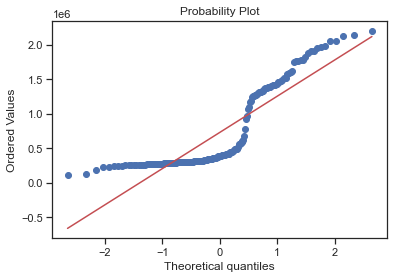

In [57]:
#применяем преобразование Бокса-Кокса.
skip['Korean won (KRW)_bxcx'], param = stats.boxcox(skip['Korean won (KRW)']) 
print('Оптимальное значение λ = {}'.format(param))

stats.probplot(skip['Korean won (KRW)'], dist="norm", plot = plt)
plt.show()

Результат, в целом, плохой, но учитывая степень отклонения исходного распределения от нормальности, ситуация улучшилась.

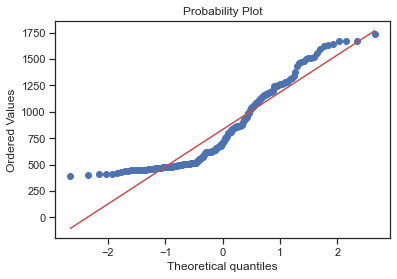

In [50]:
stats.probplot(skip['Swiss franc (CHF)'], dist="norm", plot = plt)
plt.show()

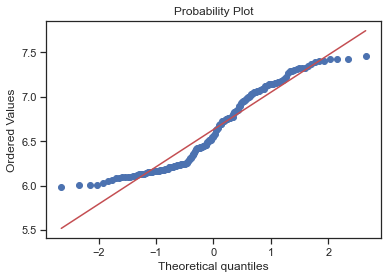

In [53]:
# применяем логарифмическое преобразование
#получаем достаточно неплохой результат
skip['Swiss franc (CHF)_log'] = np.log(skip['Swiss franc (CHF)'])

stats.probplot(skip['Swiss franc (CHF)_log'], dist="norm", plot = plt)
plt.show()